# Plotting battery voltage and temperature time series

Plotting the **voltage-temperature** data from an [Osan Pathfinder](https://www.osan.tech) SQLite database file. The script is useful when evaluating/estimating power consumption of various profile settings and battery chemistries.

### Read sqlite query results into a pandas DataFrame

In [1]:
import pandas as pd
import sqlite3

con = sqlite3.connect("denseML_0006_20220531_2103.sqlite3")

df = pd.read_sql_query("""select tv.timestamp as timestamp, voltage, temperature
                          from  ts_voltage as tv, ts_temperature as tt
                          where tv.timestamp == tt.timestamp""", con)
con.close()

### Convert timestamp string to pandas dataframe format

In [2]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

### Verify that the result is stored in the dataframe

In [3]:
print(df.head())

            timestamp  voltage  temperature
0 2022-05-18 16:00:00     1.53           28
1 2022-05-18 17:00:00     1.53           24
2 2022-05-18 18:00:00     1.52           23
3 2022-05-18 19:00:00     1.52           23
4 2022-05-18 20:00:00     1.51           22


### Do da plotting

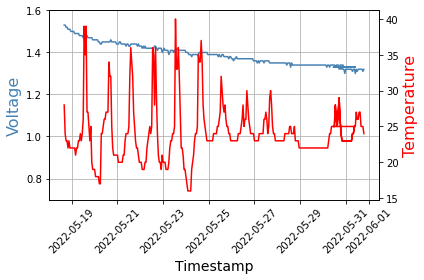

In [18]:
import matplotlib.pyplot as plt

# define colors to use
col1 = 'steelblue'
col2 = 'red'

# define subplots
fig,ax = plt.subplots()

#  rotate timestamp ticks
degrees = 45
plt.xticks(rotation=degrees)

#add a grid
plt.grid(True)

# add first line to plot
ax.plot(df.timestamp, df.voltage, color=col1)

# add x-axis label
ax.set_xlabel('Timestamp', fontsize=14)

# add y-axis label
ax.set_ylabel('Voltage', color=col1, fontsize=16)

# define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

# add second line to plot
ax2.plot(df.timestamp, df.temperature, color=col2)

# add second y-axis label
ax2.set_ylabel('Temperature', color=col2, fontsize=16)

# set voltage span
ax.set_ylim([0.7, 1.6])

plt.tight_layout()

plt.savefig('voltage_temperature.jpg', dpi=125)
# plt.savefig('voltage_temperature.png', dpi=125)

plt.show()